In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score

In [3]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [4]:
data=pd.read_csv('Train Data.csv')

In [5]:
data.head()
data.shape

(40508, 16)

In [6]:
X=data.drop(['target'],axis=1)
Y=data['target']
X.shape
X=pd.get_dummies(X)

In [9]:
X.head()
X.shape

(40508, 40)

In [10]:
X=X.drop(['job_blue-collar'],1)
X=X.drop(['last_month_jun'],1)
X=X.drop(['poutcome_other'],1)
X=X.drop(['marital_divorced'],1)
X=X.drop(['connect_no'],1)
X=X.drop(['landline_no'],1)
X=X.drop(['smart_no'],1)
X=X.drop(['education_primary'],1)

KeyError: "['job_blue-collar'] not found in axis"

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
X= pd.DataFrame(scaler.fit_transform(X),columns = list(X))
X.head()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.428571,0.074882,0.133333,0.071777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.506494,0.073275,0.133333,0.007727,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
data2=pd.read_csv('Validate Data.csv')

In [14]:
data2.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,unknown,0


In [15]:
data2.shape

(4521, 16)

In [16]:
X_test=data2.drop(['target'],axis=1)
Y_test=data2['target']
X_test.shape

(4521, 15)

In [17]:
X_test=pd.get_dummies(X_test)
X_test.head()
X_test.shape

(4521, 48)

In [18]:
X_test=X_test.drop(['job_blue-collar'],1)
X_test=X_test.drop(['last_month_jun'],1)
X_test=X_test.drop(['poutcome_other'],1)
X_test=X_test.drop(['marital_divorced'],1)
X_test=X_test.drop(['connect_no'],1)
X_test=X_test.drop(['landline_no'],1)
X_test=X_test.drop(['smart_no'],1)
X_test=X_test.drop(['education_primary'],1)

In [19]:
X_test= pd.DataFrame(scaler.fit_transform(X_test),columns = list(X_test))
X_test.head()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
X_test

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.039999,0.966667,0.107580,0.081633,0.000000,0.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,0.558824,0.000000,0.266667,0.049321,0.000000,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4518,0.558824,0.048429,0.600000,0.048659,0.204082,0.000000,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4519,0.132353,0.059731,0.166667,0.041377,0.061224,0.243119,0.12,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_test.shape
Y_test.shape
X.shape
Y.shape

(40508,)

In [22]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [23]:
os = SMOTE(random_state=42,ratio=0.5)
os_X, os_Y = os.fit_sample(X,Y)
os_X = pd.DataFrame(data=os_X,columns=list(X))
os_Y = pd.DataFrame(data=os_Y, columns=['target'])
os_Y.mean()

target    0.333327
dtype: float64

# Logi


In [24]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
X = sm.add_constant(X)
X.head()

,const,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,1.0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.428571,0.074882,0.133333,0.071777,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.506494,0.073275,0.133333,0.007727,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
cols = X.columns.tolist()
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.Logit(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[0:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax() # returns index of max p value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE) 

Optimization terminated successfully.
         Current function value: 0.243460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243461
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243469
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243480
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243491
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.243526
  

In [26]:
 selected_features_BE.remove('const')

In [24]:
reg = LogisticRegression() 

In [25]:
reg.fit(os_X[selected_features_BE],os_Y)

C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(classification_report(Y_test,reg.predict(X_test[selected_features_BE])))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      4000
           1       0.36      0.82      0.50       521

    accuracy                           0.81      4521
   macro avg       0.67      0.82      0.69      4521
weighted avg       0.90      0.81      0.84      4521



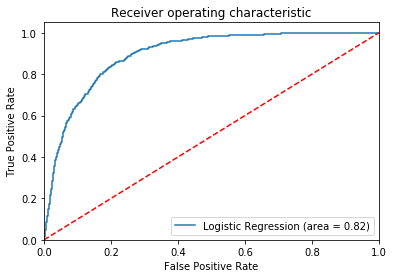

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, reg.predict(X_test[selected_features_BE]))
fpr, tpr, thresholds = roc_curve(Y_test, reg.predict_proba(X_test[selected_features_BE])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C =np.arange(1,20,0.5)
params = dict(C=C, penalty=penalty)

In [28]:
clf = GridSearchCV(reg, params, cv=5, verbose=0,scoring='roc_auc')#


In [29]:
clf.fit(os_X[selected_features_BE],os_Y)

C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5]),
                         'penalty': ['l1', 'l2']},
    

In [30]:
clf.best_params_

{'C': 9.0, 'penalty': 'l1'}

In [31]:
print(classification_report(Y_test,clf.best_estimator_.predict(X_test[selected_features_BE])))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      4000
           1       0.36      0.83      0.50       521

    accuracy                           0.81      4521
   macro avg       0.66      0.82      0.69      4521
weighted avg       0.90      0.81      0.84      4521



In [32]:
print(roc_auc_score(Y_test,clf.best_estimator_.predict(X_test[selected_features_BE])))

0.8167123320537428


In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, clf.predict(X_test[selected_features_BE]))
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_test[selected_features_BE])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'Y_test' is not defined

# Random forest

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [34]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
bg = BaggingClassifier()
sample_split_range = list(range(2, 50))
AdaBoostClassifier()
params = {
    'max_depth':range(12,16)
}

In [37]:
gclassifier = GridSearchCV(rf, params, cv=5, verbose=0,scoring='roc_auc')


In [38]:
gclassifier.fit(os_X,os_Y)

C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [63]:
classifier = AdaBoostClassifier(
    RandomForestClassifier(max_depth=10),
    n_estimators=100
)

In [64]:
classifier.fit(os_X,os_Y)

C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators='warn',
                       

In [67]:
print(classification_report(Y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      4000
           1       0.39      0.84      0.53       521

    accuracy                           0.83      4521
   macro avg       0.68      0.84      0.72      4521
weighted avg       0.91      0.83      0.85      4521



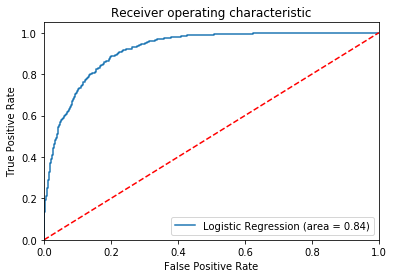

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
roc_auc_score(Y_test,classifier.predict(X_test))

0.836389875239923

# Naive Bayes

In [43]:
from sklearn.svm import SVC

In [44]:
svm = SVC()

In [45]:
svm.fit(os_X,os_Y)

C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
print(classification_report(Y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      4000
           1       0.39      0.83      0.53       521

    accuracy                           0.83      4521
   macro avg       0.68      0.83      0.71      4521
weighted avg       0.91      0.83      0.85      4521



In [52]:
roc_auc_score(Y_test,svm.predict(X_test))

0.8284179462571978

In [53]:
from sklearn.ensemble import VotingClassifier

In [58]:
eAlg = VotingClassifier(estimators=[('LR',clf.best_estimator_),('RF',rf),('SVC',svm)],
                        voting='hard',
                        weights=[1,1,1])

In [59]:
eAlg.fit(os_X,os_Y)

C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aashna\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=9.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [60]:
print(roc_auc_score(Y_test,eAlg.predict(X_test)))

0.8306317178502879


In [81]:
print(classification_report(Y_test,eAlg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      4000
           1       0.39      0.83      0.53       521

    accuracy                           0.83      4521
   macro avg       0.68      0.83      0.71      4521
weighted avg       0.91      0.83      0.85      4521

